In [ ]:
# %%bash: 아래 명령어는 bash 이다.
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

In [2]:
# JAVA 환경변수 설정
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
# %%bash: 아래 명령어는 bash 이다.
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

In [ ]:
import pandas as pd
from konlpy.tag import Mecab
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
m = Mecab()

In [5]:
# google drive 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# econoi.json 가져오기
filename = '/content/drive/MyDrive/Colab Notebooks/wordCloudPython/econoi.json'
# Pandas 로 json 파일 가져오기
df = pd.read_json(filename, lines=True)
# df

In [7]:
noun = set(["NNG", "NNP", "NP"])
verb_adject = set(["VV", "VA"])


In [8]:
df.head(3)

,_id,news_url,news_title,news_subtitle,news_author,news_data,news_article,news_img_path,news_source
0,{'$oid': '61ff7a222d2b7dcac035a875'},http://www.econoi.com/news/articleView.html?id...,"어린이 캘리그라퍼, 외국어와 미리캔버스 강의",소득 활동하며 돈의 가치 배워요,어린이 경제신문,2022-02-02 10:30,”제가 쓴 글과 그림이 진짜 상품에 쓰이고 산모들에게 팔린다니...”이다연(청원초·...,https://cdn.econoi.com/news/photo/202201/32379...,어린이 경제신문
1,{'$oid': '61ff7a222d2b7dcac035a876'},http://www.econoi.com/news/articleView.html?id...,[통통경제 22] 사람이 살아가는 데 필요한 모든 것,2022년 연간 기획 - 통통경제22 ② 경제가 뭐니?,어린이 경제신문,2022-01-26 15:53,"뜻으로 만나요 희소성 해결하는 활동, 경제 사람이 살아가려면 꼭 필요한 게 있어요....",https://cdn.econoi.com/news/photo/202201/32369...,어린이 경제신문
2,{'$oid': '61ff7a222d2b7dcac035a877'},http://www.econoi.com/news/articleView.html?id...,"경제·금융교육, 선택에서 필수로",null,어린이 경제신문,2022-01-26 11:19,"“‘자녀 경제교육, 어떻게 할 것인가?’를 주제로 세 차례 줌 강의를 실시합니다. ...",https://cdn.econoi.com/news/photo/202201/32364...,어린이 경제신문


In [9]:
word_list = []
for news_title in df['news_title'].to_list():
    for word,tag in m.pos(news_title):
        if tag in verb_adject:
            word_list.append(word+"다")
        elif tag in noun:
            word_list.append(word)

In [10]:
num = 150
counts = Counter(word_list)
selected = counts.most_common(num)
# print(selected)

In [11]:
wc = WordCloud(font_path='/content/drive/MyDrive/Colab Notebooks/wordCloudPython/fonts/BMJUA_otf.otf', 
               background_color="white", 
               max_font_size=60)


In [12]:
cloud = wc.generate_from_frequencies(dict(selected))
# save as file
# cloud.to_file('test.jpg')

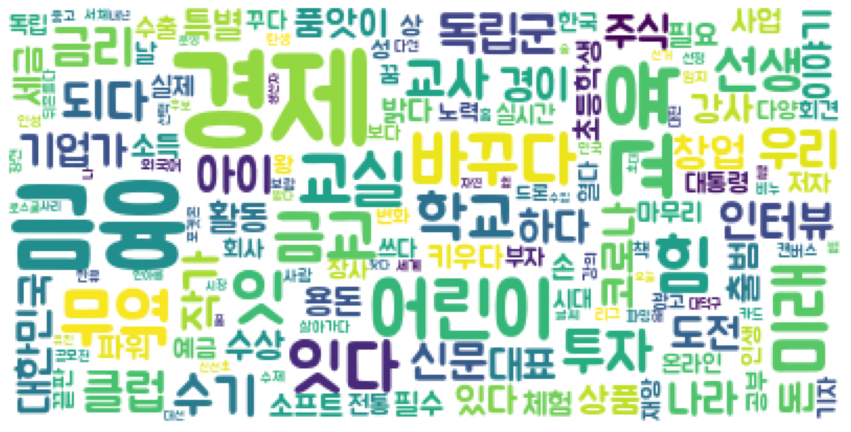

In [13]:
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()